In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



In [2]:
# Open and read the file
with open("train_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Strip newline characters
lines = [line.strip() for line in lines]

print(lines[:5])   # show first 5 lines

['1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.', '2 ::: Cupid (1997) ::: thriller ::: A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.', '3 ::: Young, Wild and Wonderful (1980) ::: adult ::: As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect th

In [3]:
df = pd.read_csv("train_data.txt", sep=":::", header=None, names=["id","movies","genre", "plot"], engine="python")
print(df.head())

   id                              movies       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                                plot  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [4]:
df.shape

(54214, 4)

In [5]:
df.genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [6]:
len(df.genre.unique())

27

So there are 27 genres in our dataset.Lets see the distribution of each genre in our dataset.

In [7]:
df.genre.value_counts()/df.shape[0]*100

genre
drama           25.109750
documentary     24.156122
comedy          13.736304
short            9.357362
horror           4.065371
thriller         2.934666
action           2.425573
western          1.903567
reality-tv       1.630575
family           1.446121
adventure        1.429520
music            1.348360
romance          1.239532
sci-fi           1.193419
adult            1.088280
crime            0.931494
animation        0.918582
sport            0.796842
talk-show        0.721216
fantasy          0.595787
mystery          0.588409
musical          0.510938
biography        0.488804
history          0.448224
game-show        0.357841
news             0.333862
war              0.243480
Name: count, dtype: float64

Text(0.5, 1.0, 'Genre Distribution')

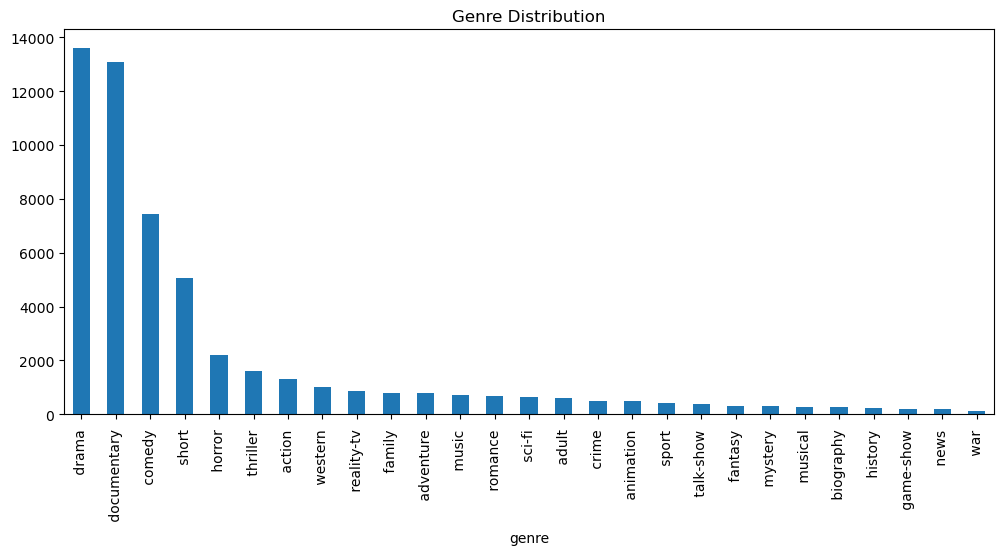

In [8]:
df['genre'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title("Genre Distribution")


so drama comprises of almost 25%, documentary 24%, comedy 13% and horror 4%. Rest are almost 2% or less.

Lets take out the dates from each movie

In [9]:
df["year"] = df["movies"].str.extract(r"\((\d{4})\)")
df.head()

,id,movies,genre,plot,year
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,2009
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1997
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1980
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1915
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,2007


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      54214 non-null  int64 
 1   movies  54214 non-null  object
 2   genre   54214 non-null  object
 3   plot    54214 non-null  object
 4   year    49867 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [11]:
null_rows = df[df["year"].isnull()]
null_rows.shape[0]/df.shape[0]*100


8.018224074962186

The null rows make only 8 percent of the entire data so the can be dropped

In [12]:
df = df.dropna(subset=["year"])
df.shape

(49867, 5)

In [13]:
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49867 entries, 0 to 54213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      49867 non-null  int64 
 1   movies  49867 non-null  object
 2   genre   49867 non-null  object
 3   plot    49867 non-null  object
 4   year    49867 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [14]:
df["year"].isnull().any()

False

In [60]:
df["year"].isna().any()

False

Splitting the data

In [63]:
X = df[['plot','year']]       # plot summaries
y = df['genre'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



In [16]:
X.head()

,plot,year
0,Listening in to a conversation between his do...,2009
1,A brother and sister with a past incestuous r...,1997
2,As the bus empties the students for their fie...,1980
3,To help their unemployed father make ends mee...,1915
4,The film's title refers not only to the un-re...,2007


In [17]:
X_train.shape

(34906, 2)

In [18]:
X_test.shape

(14961, 2)

MODEL BUILDING: TF-IDF WITH LOGISTIC REGRESSION

In [19]:
preprocessor = ColumnTransformer([('tfidf', TfidfVectorizer(stop_words='english', max_features=5000), 'plot'),('scaler', StandardScaler(), ['year'])])
logmodel = Pipeline([('preprocessor', preprocessor),('clf', LogisticRegression(max_iter=1000))])
logmodel.fit(X_train, y_train)
y_pred_logmodel = logmodel.predict(X_test)


In [20]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logmodel))
print(classification_report(y_test, y_pred_logmodel))


Logistic Regression Results:
Accuracy: 0.5849876345164093


C:\Users\Soma Bhattacharya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.49      0.22      0.30       324
       adult        0.52      0.29      0.37       150
   adventure        0.60      0.14      0.23       229
   animation        0.56      0.07      0.13       139
   biography        0.00      0.00      0.00        73
      comedy        0.51      0.57      0.54      2079
       crime        0.00      0.00      0.00       139
 documentary        0.66      0.86      0.75      3840
       drama        0.55      0.77      0.64      3722
      family        0.62      0.08      0.15       213
     fantasy        1.00      0.01      0.02        81
   game-show        0.88      0.39      0.54        59
     history        0.00      0.00      0.00        72
      horror        0.67      0.54      0.60       533
       music        0.65      0.40      0.50       225
     musical        0.38      0.04      0.08        71
     mystery        0.67      0.02      0.04        93
        n

C:\Users\Soma Bhattacharya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Soma Bhattacharya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


USING THIS ON TEST DATA SET

In [21]:
df_test= pd.read_csv("test_data.txt", 
                 sep=":::", 
                 header=None, 
                 names=["id","movies", "plot"], 
                 engine="python")

In [22]:
df_test.head()

,id,movies,plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [23]:
df_test["year"] = df_test["movies"].str.extract(r"\((\d{4})\)")
df_test["year"] = pd.to_numeric(df_test["year"], errors="coerce")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      54200 non-null  int64  
 1   movies  54200 non-null  object 
 2   plot    54200 non-null  object 
 3   year    49815 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


In [24]:
df_test=df_test.dropna(subset=["year"])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49815 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49815 non-null  int64  
 1   movies  49815 non-null  object 
 2   plot    49815 non-null  object 
 3   year    49815 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.9+ MB


In [25]:
df_test["year"].isnull().any()

False

In [59]:
df_test["year"].isna().any()

False

In [26]:
X_new = df_test[['plot','year']]       # plot summaries

In [27]:
y_new_pred = logmodel.predict(X_new)

In [28]:
print(y_new_pred)

[' drama ' ' drama ' ' documentary ' ... ' comedy ' ' drama '
 ' documentary ']


Tallying with solution dataset to see what accuracy

In [49]:
df_soln= pd.read_csv("test_data_solution.txt", sep=":::", header=None, names=["movies","genre", "plot"], engine="python")

In [50]:
df_soln.head()

,movies,genre,plot
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [51]:
df_soln["year"] = df_soln["movies"].str.extract(r"\((\d{4})\)")
df_soln["year"] = pd.to_numeric(df_soln["year"], errors="coerce")
df_soln=df_soln.dropna(subset=["year"])
df_soln.head()

,movies,genre,plot,year
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",1998.0
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",1977.0
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,2010.0
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",2015.0
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,1955.0


In [52]:
df_soln["year"].isnull().any()

False

In [58]:
df_soln["year"].isna().any()

False

In [53]:
print(df_soln.shape)
print(df_test.shape)

(49815, 4)
(49815, 4)


In [54]:
df_test.head()

,id,movies,plot,year
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",1998.0
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",1977.0
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,2010.0
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",2015.0
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,1955.0


In [55]:
df_soln.head()

,movies,genre,plot,year
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...",1998.0
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...",1977.0
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,2010.0
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...",2015.0
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,1955.0


In [56]:
y_soln=df_soln["genre"]

In [57]:
acc = accuracy_score(y_soln, y_new_pred)

precision = precision_score(y_soln, y_new_pred, average='macro')
recall = recall_score(y_soln, y_new_pred, average='macro')
f1 = f1_score(y_soln, y_new_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

C:\Users\Soma Bhattacharya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.581712335641875
Precision: 0.5235638097161186
Recall: 0.23456147389647536
F1 Score: 0.2734506556979052
